In [107]:
#valid entries for pitch_type include: 'offspeed' or 'fastballs'

def bat_vs_pitch(mlb_id, pitch_type):
    from pybaseball import statcast_batter
    
    import matplotlib.pyplot as plt
    
    import pandas as pd
    
    import matplotlib.patches as patches
    
    from datetime import datetime
    
    today = datetime.today().strftime('%Y-%m-%d')
    
    #gets pitch data for chosen player
    data = statcast_batter('2015-3-30', today, player_id = mlb_id)
    
    #removes all pitches that are intentional balls or pitchouts
    new_data = data.loc[(data['description']!= 'intent_ball') | (data['pitch_type']!='PO')]
    
    #gets the mean of every available stat (will be used to generate strikezone)
    avgs =new_data.describe()
    
    #gets the average top measurement of the strikezone for the specific player
    top_sz = avgs['sz_top'][1]
    
    #gets the average bottom measurement of the strikezone for the specific player
    bot_sz = avgs['sz_bot'][1]
    
    name = new_data['player_name'][0]
    
    #gets all pitches that were hit into play by player
    in_play = new_data[new_data['description'].str.contains('hit_into_play')]
    
    vs_soft = in_play.loc[in_play['pitch_type'].isin(['CU', 'SL', 'CH', 'KC', 'EP'])]
    
    vs_hard = in_play.loc[in_play['pitch_type'].isin(['FF', 'FC', 'FT', 'SI', 'FS'])]
    
    fig, ax = plt.subplots()
    
    #generates strikezone using the measurements we got above
    strikezone = patches.Rectangle((-0.70833,bot_sz), width= 17/12, height = (top_sz-bot_sz), fill=False)
    
    #generates hexbin plot of all pitches that the player hit and measures the estimated ba of every pitch
    #in each bin 
    if pitch_type == 'offspeed':
        graph  = plt.hexbin(vs_soft['plate_x'],vs_soft['plate_z'],C=vs_soft['estimated_ba_using_speedangle'], 
           gridsize=(5,5), mincnt=2, vmax = 1,vmin =0, cmap= 'Reds')
    
    elif pitch_type == 'fastballs':
        
        graph = plt.hexbin(vs_hard['plate_x'],vs_hard['plate_z'],C=vs_hard['estimated_ba_using_speedangle'], 
           gridsize=(5,5), mincnt=2, vmax = 1,vmin =0, cmap= 'Reds')
    
    else:
        
        msg1=print('Function arguments are incorrect, the first argument should be an mlbam id for a player. ')
        
        msg2=print('The second argument can either be offspeed or fastballs')
        
        graph = msg1+msg2
    
    #makes the graph the right shape 
    ax.axis('equal')
    
    #overlays the strikezone over the hexbin plot
    ax.add_patch(strikezone)
    
    #places a colorbar to measure the estimated ba in each hexagon
    cbar = fig.colorbar(graph)
    
    cbar.set_label('Estimated BA')
    
    ax.set_title(name +' vs. ' + pitch_type)
    
    return graph

In [53]:
from pybaseball import playerid_lookup
playerid_lookup('trout', 'mike')

Gathering player lookup table. This may take a moment.


,name_last,name_first,key_mlbam,key_retro,key_bbref,key_fangraphs,mlb_played_first,mlb_played_last
0,trout,mike,545361,troum001,troutmi01,10155,2011.0,2019.0


Gathering Player Data


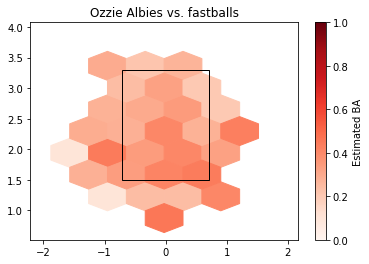

In [108]:
bat_vs_pitch(645277, 'fastballs')

Gathering Player Data


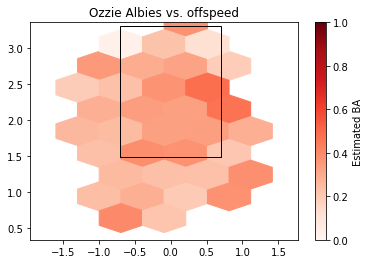

In [109]:
bat_vs_pitch(645277, 'offspeed')